In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

os.chdir('/Users/wynnephilpott/Documents/missing pauldron/Data Science/datasets')

In [59]:
df = pd.read_csv('dfs.csv')

**Machine Leraning Packages**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import LogisticRegression

**Females**

In [61]:
female = df[df['gender']==0]

female = female[['dec','int_corr','attr','samerace', 'age_o', 
                 'race_o','sinc', 'intel', 'fun', 'amb', 'like', 'prob', 'met']]

In [62]:
female.describe().T

,count,mean,std,min,25%,50%,75%,max
dec,3099.0,0.376573,0.484605,0.00,0.00,0.00,1.00,1.00
int_corr,3099.0,0.196818,0.304702,-0.83,-0.02,0.21,0.43,0.91
attr,3099.0,5.967570,1.987127,0.00,5.00,6.00,7.00,10.00
samerace,3099.0,0.395934,0.489129,0.00,0.00,0.00,1.00,1.00
age_o,3099.0,26.622459,3.347155,18.00,24.00,27.00,29.00,42.00
race_o,3099.0,2.755082,1.247995,1.00,2.00,2.00,4.00,6.00
sinc,3099.0,7.125524,1.833285,0.00,6.00,7.00,8.00,10.00
intel,3099.0,7.495644,1.563606,0.00,7.00,8.00,9.00,10.00
fun,3099.0,6.312036,2.025281,0.00,5.00,6.00,8.00,10.00
amb,3099.0,6.999677,1.809790,0.00,6.00,7.00,8.00,10.00


**Model w/ no features**

In [63]:
female = df[df['gender']==0]

female = female[['dec','int_corr','attr','samerace', 'age_o', 
                 'race_o','sinc', 'intel', 'fun', 'amb', 'like', 'prob', 'met']]

In [64]:
X = female.drop('dec',axis=1)
y = female['dec']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=101)

lgm = LogisticRegression()
lgm.fit(X_train,y_train)                                                    
pred = lgm.predict(X_test)

print(cr(y_test,pred))
print(cm(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       582
           1       0.68      0.58      0.63       348

   micro avg       0.74      0.74      0.74       930
   macro avg       0.72      0.71      0.71       930
weighted avg       0.73      0.74      0.74       930

[[485  97]
 [145 203]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


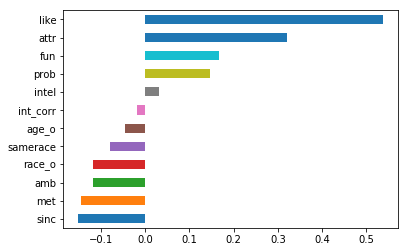

In [65]:
coefficients = lgm.coef_
feature_importance = pd.Series(coefficients[0],
                               index=X.columns)
ordered_feature_importance = feature_importance.sort_values()
ordered_feature_importance.plot.barh()

Lets engineer important features.

First consider correlated items and remove them as corr is sometimes detrimental to model accuracy.

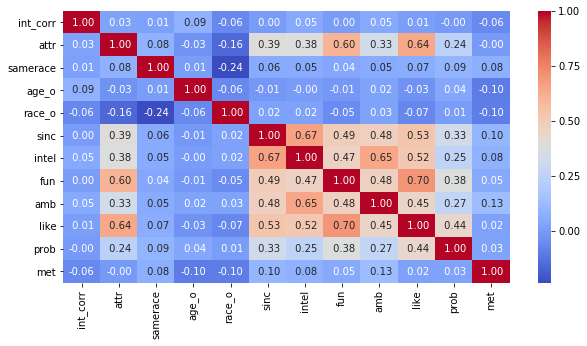

In [67]:
plt.figure(figsize=(10,5))
sns.heatmap(female.drop('dec',axis=1).corr(),cbar=True,fmt =' .2f', annot=True, cmap='coolwarm')

Despite what Ive read, I found out after some testing that removing these correlated items actually harms the model, so we will keep then in there.

**Like**

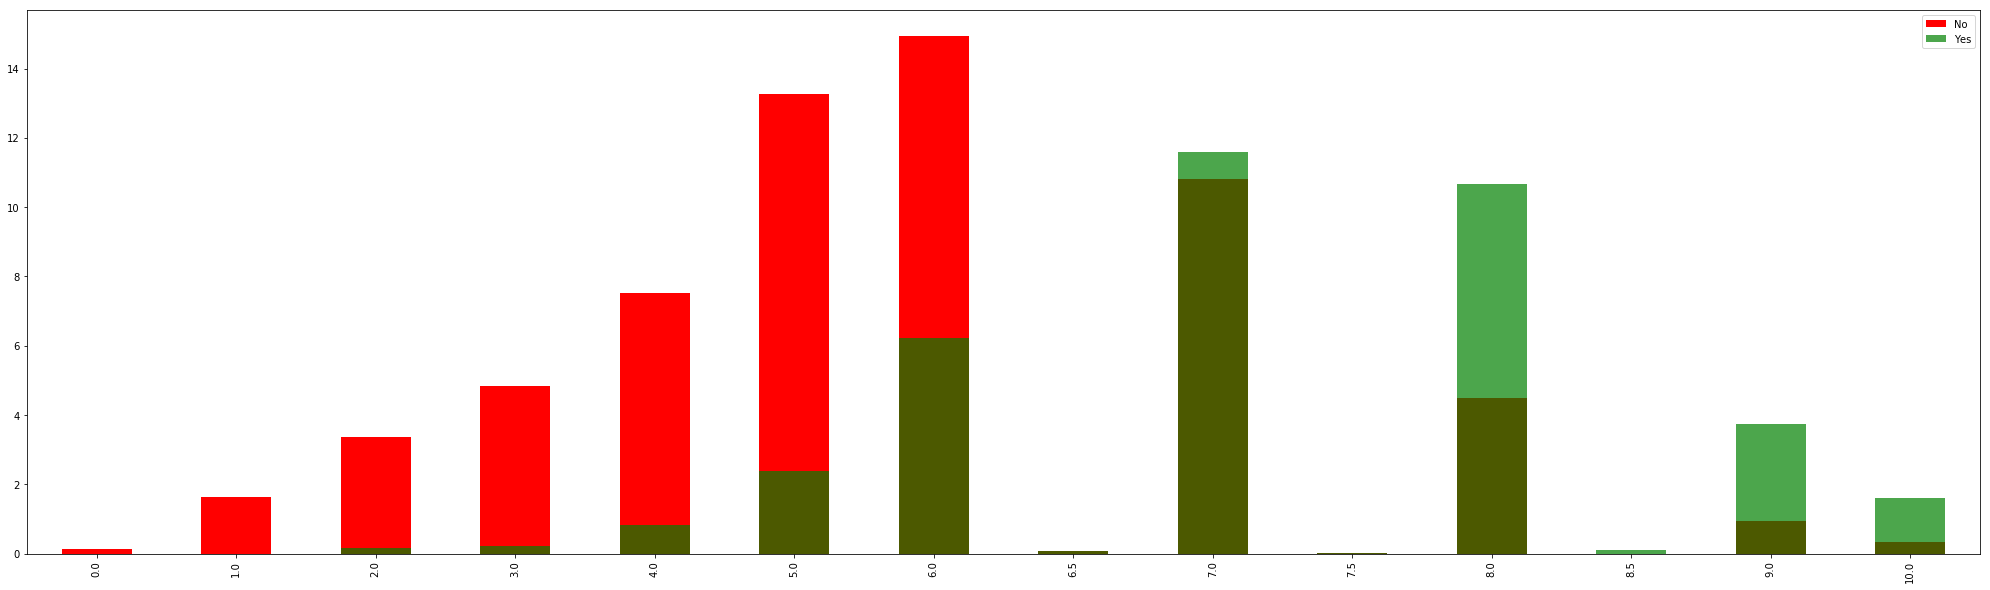

In [68]:
female.like = female.like.astype('category')

ax = pd.Series((female[female.dec==0].like.value_counts()/len(female.dec))*100).sort_index().plot(kind='bar',color='r',figsize=(35,10))
pd.Series((female[female.dec==1].like.value_counts()/len(female.dec))*100).sort_index().plot(kind='bar',color='g',alpha= 0.7,figsize=(35,10), ax=ax)
ax.legend(["No", "Yes"])


It is clear that there the like feature is not linear so plugging it in to a linear model as is will yield inaccurate results. Let's use the binning technique to 'linearize.

In [69]:
like_bins = [0,1,2,3,4,5,6,7,8,9,10]

**Attr**

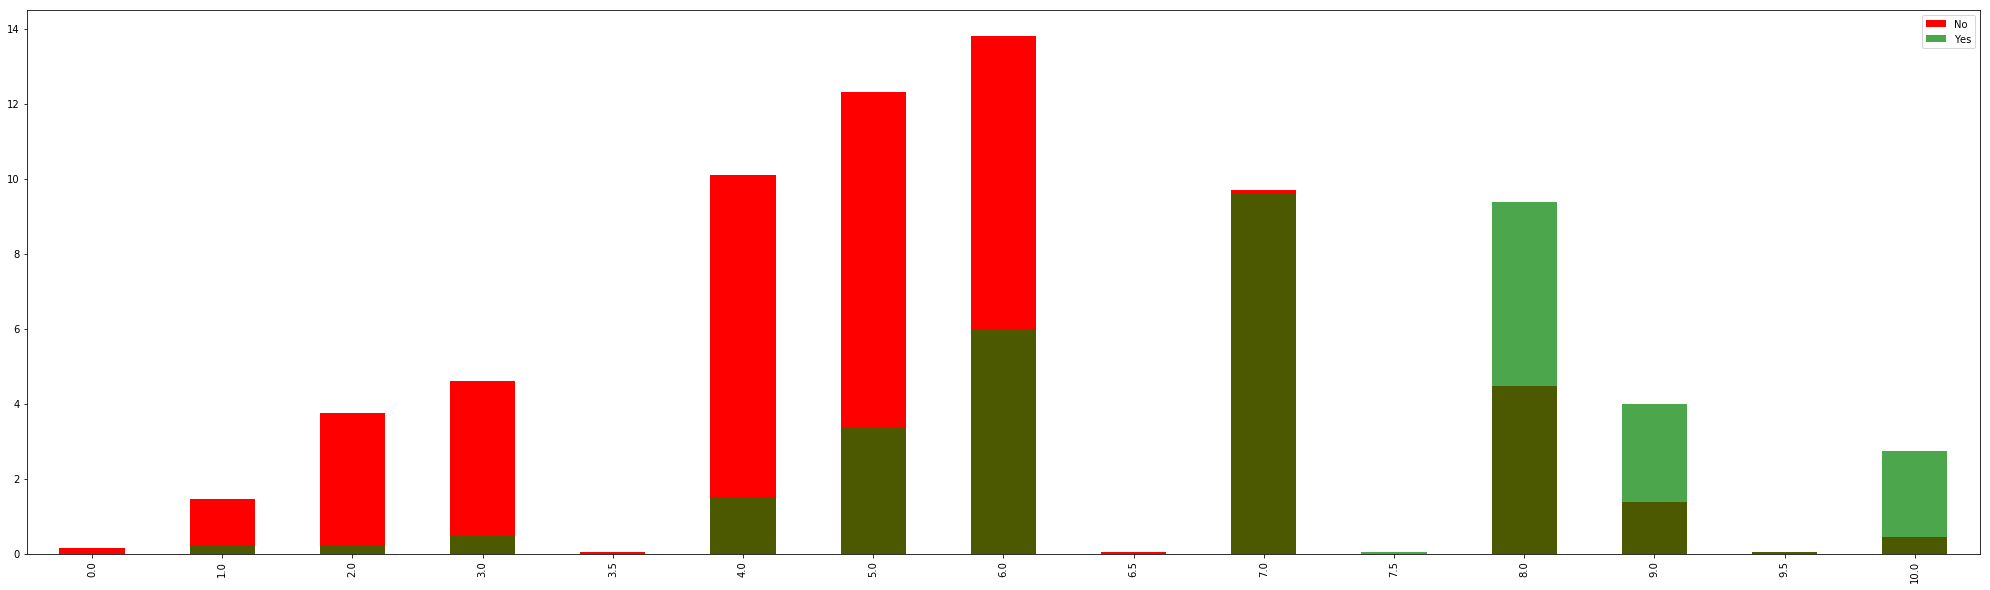

In [70]:
female.attr = female.attr.astype('category')

ax = pd.Series((female[female.dec==0].attr.value_counts()/len(female.dec))*100).sort_index().plot(kind='bar',color='r',figsize=(35,10))
pd.Series((female[female.dec==1].attr.value_counts()/len(female.dec))*100).sort_index().plot(kind='bar',color='g',alpha= 0.7,figsize=(35,10), ax=ax)
ax.legend(["No", "Yes"])

Similarly for attraction.

In [71]:
attr_bins = [0,1,2,3,4,5,6,7,8,9,10]

Engineer the features

In [72]:
#if needed to reboot
female = df[df['gender']==0]

female = female[['dec','int_corr','attr','samerace', 'age_o', 
                 'race_o','sinc', 'intel', 'fun', 'amb', 'like', 'prob', 'met']]

In [73]:
female['like_bin'] = pd.cut(female.like,like_bins)

female['attr_bin'] = pd.cut(female.attr,attr_bins)

female = pd.concat([female, pd.get_dummies(female['like_bin'],prefix='like', prefix_sep='_')], axis=1)
female.drop('like', inplace=True, axis=1)
female.drop('like_bin', inplace=True, axis=1)

female = pd.concat([female, pd.get_dummies(female['attr_bin'],prefix='attr', prefix_sep='_')], axis=1)
female.drop('attr', inplace=True, axis=1)
female.drop('attr_bin', inplace=True, axis=1)

In [74]:
female.columns

Index(['dec', 'int_corr', 'samerace', 'age_o', 'race_o', 'sinc', 'intel',
       'fun', 'amb', 'prob', 'met', 'like_(0, 1]', 'like_(1, 2]',
       'like_(2, 3]', 'like_(3, 4]', 'like_(4, 5]', 'like_(5, 6]',
       'like_(6, 7]', 'like_(7, 8]', 'like_(8, 9]', 'like_(9, 10]',
       'attr_(0, 1]', 'attr_(1, 2]', 'attr_(2, 3]', 'attr_(3, 4]',
       'attr_(4, 5]', 'attr_(5, 6]', 'attr_(6, 7]', 'attr_(7, 8]',
       'attr_(8, 9]', 'attr_(9, 10]'],
      dtype='object')

In [75]:
X = female[['int_corr', 'samerace', 'age_o', 'race_o', 'sinc', 'intel',
       'fun', 'amb', 'prob', 'met', 'like_(0, 1]', 'like_(1, 2]',
       'like_(2, 3]', 'like_(3, 4]', 'like_(4, 5]', 'like_(5, 6]',
       'like_(6, 7]', 'like_(7, 8]', 'like_(8, 9]', 'like_(9, 10]',
       'attr_(0, 1]', 'attr_(1, 2]', 'attr_(2, 3]', 'attr_(3, 4]',
       'attr_(4, 5]', 'attr_(5, 6]', 'attr_(6, 7]', 'attr_(7, 8]',
       'attr_(8, 9]', 'attr_(9, 10]']]
y = female['dec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

lgm = LogisticRegression()
lgm.fit(X_train,y_train)
pred = lgm.predict(X_test)

print(cr(y_test,pred))
print(cm(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       582
           1       0.69      0.64      0.66       348

   micro avg       0.76      0.76      0.76       930
   macro avg       0.74      0.73      0.74       930
weighted avg       0.75      0.76      0.75       930

[[483  99]
 [127 221]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We gained 18 TPs at the expense of 2 TNs.

Using this knowledge that feature engineering bumps up our F1 score, we could apply similar techniques to the different clusters we analyzed earlier.